In [15]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.express as px

In [3]:
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define paths to the training and test data
train_data_path = '/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/Train.csv'
test_data_path = '/content/drive/MyDrive/fire-extent-prediction-challenge-120240716-19716-ztmgh3/Test.csv'

In [5]:
# Load the training and test data
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [6]:
# Function to preprocess the data
def wrangle(path):
  df = pd.read_csv(path)
  columns_to_drop = []
  df.drop(columns_to_drop, axis=1, inplace=True)
  # Extract relevant date information from the 'ID' column
  df[["ID","Date"]]=df['ID'].str.split('_', expand=True)
  df[["year","month","day"]]=df['Date'].str.split('-', expand=True)
  df['month']=df['month'].astype(int)
  # Drop columns of low cardinality
  columns_to_drop.append("day")
  columns_to_drop.append("climate_swe")
  columns_to_drop.append("landcover_3")
  # Drop columns of high cardinality
  columns_to_drop.append("ID")
  # Other Columns to drop
  columns_to_drop.append("Date")
  columns_to_drop.append("year")
  # Drop highly correlated feature
  #columns_to_drop.append("climate_pr")
  columns_to_drop.append("lat")
  columns_to_drop.append("lon")
  df.drop(columns_to_drop, axis=1, inplace=True)

  return df

In [7]:
train_data.head()

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2001-01-01,-15.858835,29.237029,0.0,1195,0,263,1195,206,10,...,0.0,0.0,0.018654,0.0,0.714446,0.012174,0.244890,0.009836,0.0,0.256932
1,1_2001-01-01,-15.858835,29.487029,0.0,1196,0,232,1196,201,10,...,0.0,0.0,0.000000,0.0,0.654783,0.000095,0.345121,0.000000,0.0,0.273093
2,2_2001-01-01,-15.858835,29.737029,0.0,1190,0,314,1190,192,10,...,0.0,0.0,0.000000,0.0,0.516421,0.000000,0.483579,0.000000,0.0,0.285109
3,3_2001-01-01,-15.858835,29.987029,0.0,1144,0,321,1144,186,66,...,0.0,0.0,0.000000,0.0,0.299000,0.163902,0.537098,0.000000,0.0,0.298418
4,4_2001-01-01,-15.858835,30.237029,0.0,1187,0,413,1187,186,9,...,0.0,0.0,0.000000,0.0,0.277392,0.067742,0.654866,0.000000,0.0,0.315621


In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [9]:
df = wrangle(train_data_path)

In [10]:
df.head()

,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_tmmn,...,landcover_0,landcover_1,landcover_2,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,month
0,0.0,1195,0,263,1195,206,10,1692,1861,211,...,0.0,0.0,0.018654,0.714446,0.012174,0.244890,0.009836,0.0,0.256932,1
1,0.0,1196,0,232,1196,201,10,1859,1867,211,...,0.0,0.0,0.000000,0.654783,0.000095,0.345121,0.000000,0.0,0.273093,1
2,0.0,1190,0,314,1190,192,10,1677,1861,208,...,0.0,0.0,0.000000,0.516421,0.000000,0.483579,0.000000,0.0,0.285109,1
3,0.0,1144,0,321,1144,186,66,1061,1864,196,...,0.0,0.0,0.000000,0.299000,0.163902,0.537098,0.000000,0.0,0.298418,1
4,0.0,1187,0,413,1187,186,9,1714,1852,204,...,0.0,0.0,0.000000,0.277392,0.067742,0.654866,0.000000,0.0,0.315621,1


In [ ]:
correlation = df.drop(columns=["lat","lon","burn_area","month"]).corr()

<Axes: >

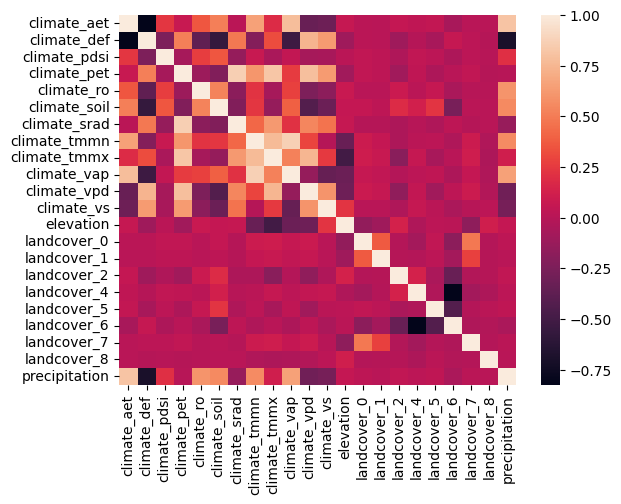

In [ ]:
sns.heatmap(correlation)

In [ ]:
# Create the scatter map box
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    size="burn_area",
    color="burn_area",
    #color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=3,
    mapbox_style="carto-positron"
)

fig.update_layout(title="Burn Area Scatter Map Box")

# Show the plot
fig.show()

Splitting the data into target and feature matrix

In [ ]:
target = "burn_area"
feature = df.columns.drop(target)

In [ ]:
len(feature)

24

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[feature], df[target], test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(74833, 24)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Scaling the feature matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled.shape

(74833, 24)

In [ ]:
# Scaling all train data
All_X_train_scaled = scaler.fit_transform(df[feature])
#X_test_scaled = scaler.fit_transform(X_test)

Model Development

In [ ]:
def predictions(data,model):
    pred = model.predict(data)
    new_pred = []
    for value in pred:
      if value < 0:
        new_pred.append(0)
      else:
        new_pred.append(value)
    return new_pred

In [ ]:
KN = KNeighborsRegressor(n_neighbors=4)
KN.fit(X_train_scaled, y_train)
y_pred = predictions(X_train_scaled,KN)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print(RMSE)
y_pred_test = predictions(X_test_scaled,KN)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE)

0.018146514180542507
0.022729330494653796


In [ ]:
RF = RandomForestRegressor(max_depth=15,n_estimators=100, random_state=42)
RF.fit(X_train_scaled, y_train)
y_pred = predictions(X_train_scaled,RF)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print(RMSE)
y_pred_test = predictions(X_test_scaled,RF)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE)

0.013080585135174379
0.02285401956106857


In [ ]:
feature_scaled = scaler.transform(df[feature])

In [ ]:
GB = GradientBoostingRegressor(max_depth=15,n_estimators=100,random_state=42)
GB.fit(feature_scaled, df[target])
y_pred = predictions(X_train_scaled,GB)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
print(RMSE)
y_pred_test = predictions(X_test_scaled,GB)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE)

0.019036269324524818
0.0012916802199933852


In [ ]:
# Create the stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RF),
        ('kn', KN)

    ],
    final_estimator=GB,  # Gradient Boosting as the final model
    passthrough=True  # Pass the original features along with predictions to the final model
)

# Train the stacking model on the train data fron train-test-split
stacking_model.fit(X_train_scaled, y_train)


# Make predictions
y_pred = stacking_model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error on Test Data: {np.sqrt(mse)}')

Root Mean Squared Error on Test Data: 0.02275883326084148


In [ ]:
# Create the stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RF),
        ('kn', KN)

    ],
    final_estimator=GB,  # Gradient Boosting as the final model
    passthrough=True  # Pass the original features along with predictions to the final model
)

# Train the stacking model on the entire dataset for better results
stacking_model.fit(df[feature], df[target])

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     random_state=42)),
                              ('kn', KNeighborsRegressor(n_neighbors=4))],
                  final_estimator=GradientBoostingRegressor(max_depth=4,
                                                            n_estimators=150,
                                                            random_state=42),
                  passthrough=True)

In [ ]:
# Evaluate the ensemble model
y_pred_train = stacking_model.predict(df[feature])
rmse_train = np.sqrt(mean_squared_error(df[target], y_pred_train))
print(f"Training RMSE: {rmse_train}")

y_pred_test = stacking_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse_test}")

Training RMSE: 0.01760087940829316
Test RMSE: 0.014899758281327507


In [ ]:
test_data.head()

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,...,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
0,0_2014-01-01,-15.858835,29.237029,1146,74,-451,1220,120,6,212,...,0.0,0.000615,0.015418,0.0,0.416704,0.023724,0.530016,0.013524,0.0,0.404243
1,1_2014-01-01,-15.858835,29.487029,1118,98,-405,1216,117,6,330,...,0.0,0.000000,0.000000,0.0,0.406436,0.000446,0.593118,0.000000,0.0,0.421489
2,2_2014-01-01,-15.858835,29.737029,1067,137,-468,1204,111,6,194,...,0.0,0.000000,0.000000,0.0,0.254791,0.000000,0.745209,0.000000,0.0,0.419122
3,3_2014-01-01,-15.858835,29.987029,969,187,-533,1156,101,5,78,...,0.0,0.000000,0.000000,0.0,0.219340,0.182153,0.598507,0.000000,0.0,0.404596
4,4_2014-01-01,-15.858835,30.237029,927,270,-505,1197,96,5,139,...,0.0,0.000000,0.000000,0.0,0.220239,0.097748,0.682013,0.000000,0.0,0.371100


In [ ]:
wrangled_test =wrangle(test_data_path)

In [ ]:
test_scaled = scaler.fit_transform(wrangled_test)

In [ ]:
wrangled_test.head()

,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_tmmn,climate_tmmx,...,landcover_0,landcover_1,landcover_2,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation,month
0,1146,74,-451,1220,120,6,212,1974,217,303,...,0.0,0.000615,0.015418,0.416704,0.023724,0.530016,0.013524,0.0,0.404243,1
1,1118,98,-405,1216,117,6,330,1973,216,304,...,0.0,0.000000,0.000000,0.406436,0.000446,0.593118,0.000000,0.0,0.421489,1
2,1067,137,-468,1204,111,6,194,1958,214,302,...,0.0,0.000000,0.000000,0.254791,0.000000,0.745209,0.000000,0.0,0.419122,1
3,969,187,-533,1156,101,5,78,1954,202,290,...,0.0,0.000000,0.000000,0.219340,0.182153,0.598507,0.000000,0.0,0.404596,1
4,927,270,-505,1197,96,5,139,1939,210,301,...,0.0,0.000000,0.000000,0.220239,0.097748,0.682013,0.000000,0.0,0.371100,1


In [ ]:
test_sub = predictions(wrangled_test,stacking_model)

In [ ]:
test_sub

[0.0003877977891628212,
 0.00014852779259545934,
 0.00014956137542288715,
 0.00021747663312957725,
 0.00022505311396440848,
 0.0002502398971210867,
 0.0002836200911831436,
 0.0002958622577958176,
 0.0002836200911831436,
 8.238433454189293e-05,
 2.980951281079506e-05,
 0.00010343122532313907,
 0,
 0.00021287255165356513,
 0.00013306299584538896,
 0.0002961536699215158,
 0.00028698192834204506,
 0.0002981702610489874,
 0.00034805753423403996,
 0.00028961084989500175,
 0.0002650848386227173,
 0.00028711926746462154,
 2.40511260972853e-05,
 0,
 0,
 7.189647231683279e-06,
 0,
 0,
 0.00027063204690799846,
 0.0003033333569296499,
 0.0003751766577450962,
 0.0004228445930277118,
 0.00034805753423403996,
 0.00023491984330903284,
 0.00015534979388300178,
 0.00036062648787925247,
 0.0003878547760276422,
 0.00036844633853718963,
 7.189647231683279e-06,
 0,
 0,
 0.00011015645104741419,
 0,
 0,
 0,
 0.000205490378300063,
 0.00025842994851637673,
 9.723041554679485e-05,
 0.0001948324514775948,
 0.0003

In [ ]:
sub = {"ID":test_data['ID'],
       "burn_area":test_sub}

In [ ]:
submission = pd.DataFrame(sub)

In [ ]:
submission.to_csv("submission.csv",index=False)